In [17]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [18]:
start = '2016-01-01'
end = '2017-01-01'
asset = get_pricing('AAPL',fields='price',start_date=start,end_date=end)
benchmark = get_pricing('SPY',fields='price',start_date=start,end_date=end)

In [19]:
asset_ret = asset.pct_change()[1:]
bench_ret = benchmark.pct_change()[1:]

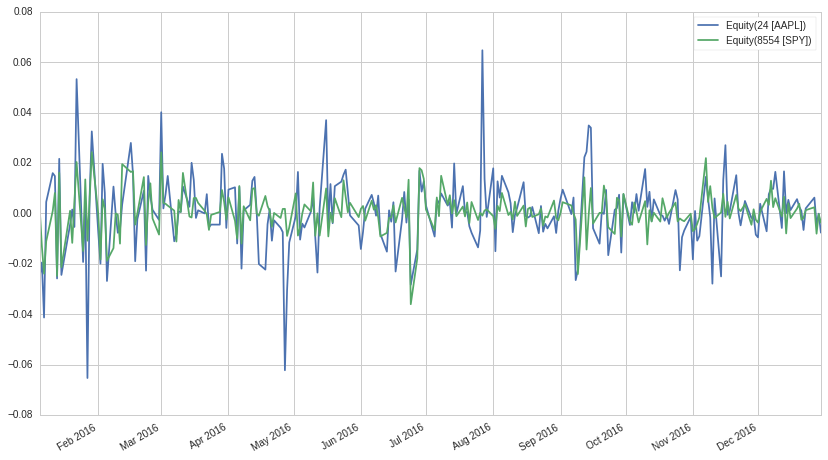

In [20]:
asset_returns.plot()
benchmark_returns.plot()
plt.legend()

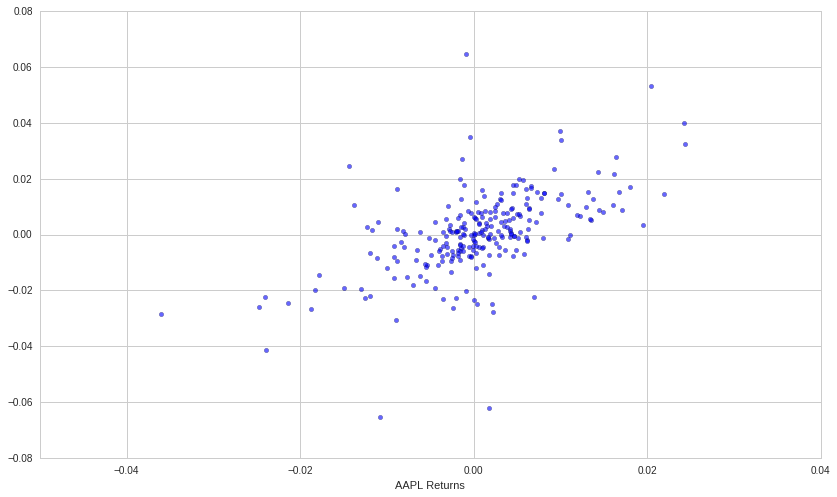

In [21]:
plt.scatter(benchmark_returns,asset_returns,alpha = 0.6)
plt.xlabel("SPY Returns")
plt.xlabel("AAPL Returns")

### Fit in a regression line

In [22]:
AAPL = asset_ret.values
spy = bench_ret.values

In [23]:
spy_constant = sm.add_constant(spy)

In [24]:
model = regression.linear_model.OLS(AAPL,spy_constant).fit()

In [25]:
model.params

array([  1.67990248e-05,   1.02981370e+00])

In [26]:
alpha,beta = model.params

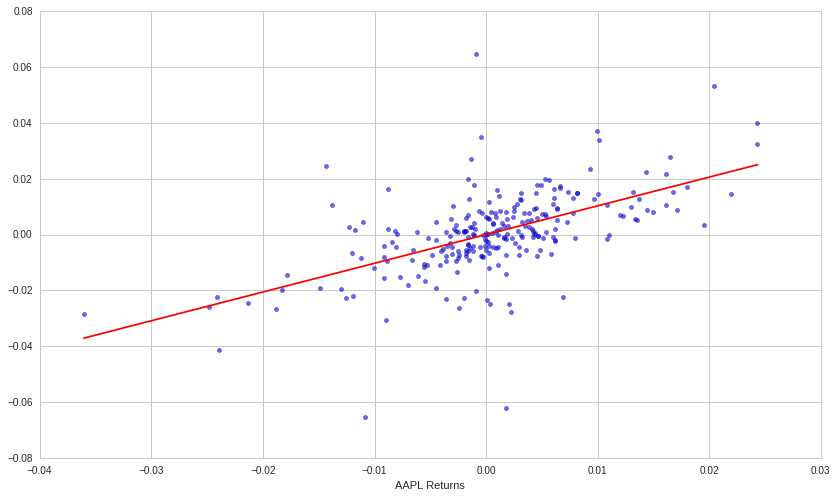

In [27]:
min_spy = benchmark_returns.values.min()
max_spy = benchmark_returns.values.max()

spy_line = np.linspace(min_spy,max_spy,100)
y = spy_line*beta + alpha

plt.plot(spy_line,y,c='r')
plt.scatter(benchmark_returns,asset_returns,alpha = 0.6)
plt.xlabel("SPY Returns")
plt.xlabel("AAPL Returns")

### Implement a hedge in order to cancel negative relationships with the market

In [28]:
hedge = -1*(beta*benchmark_returns) + asset_returns

### The AAPL with Hedge will try to minimize losses but also in doing so we get a minimization in profits as well. This strategy is mostly used by conservative investors

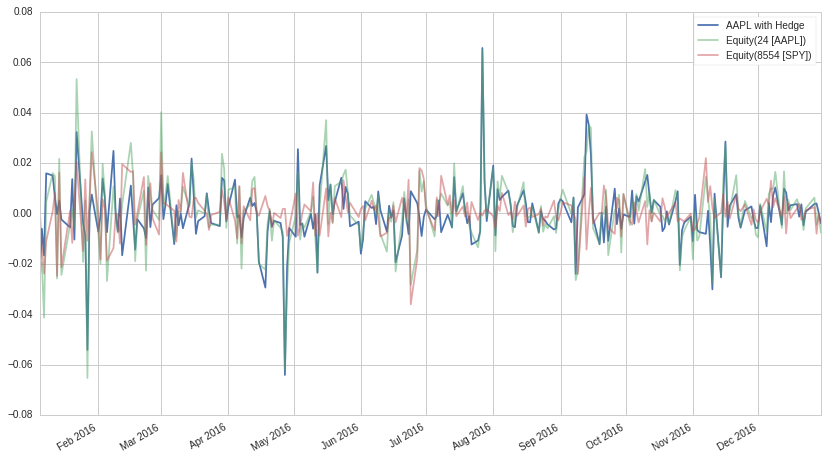

In [29]:
hedge.plot(label='AAPL with Hedge')
asset_returns.plot(alpha=0.5)
benchmark_returns.plot(alpha=0.5)
plt.legend()

### Look at July drop with hedge growth

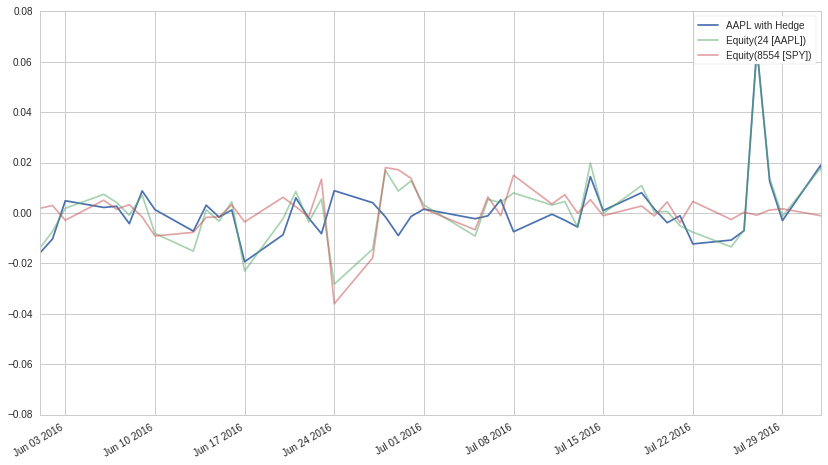

In [30]:
hedge.plot(label='AAPL with Hedge')
asset_returns.plot(alpha=0.5)
benchmark_returns.plot(alpha=0.5)
plt.xlim(['2016-06-01','2016-08-01'])
plt.legend()

In [31]:
#Making it more modular
def alpha_beta(benchmark_returns,stock):
    benchmark = sm.add_constant(benchmark_returns)
    
    model = regression.linear_model.OLS(stock,benchmark).fit()
    
    return model.params[0],model.params[1]

In [32]:
"""
2016 - 2017

"""

start = '2016-01-01'
end = '2017-01-01'

asset_2016 = get_pricing('AAPL',fields='price',start_date=start,end_date=end)
benchmark_2016 = get_pricing('SPY',fields='price',start_date=start,end_date=end)

asset_returns_2016 = asset_2016.pct_change(1)[1:]
benchmark_returns_2016 = benchmark_2016.pct_change(1)[1:]

assetReturn_values = asset_returns_2016.values
benchmarkReturn_values = benchmark_returns_2016.values

alpha2016,beta2016 = alpha_beta(benchmarkReturn_values, assetReturn_values)

print('2016 Values')
print('Alpha: ' + str(alpha2016))
print('Beta: ' + str(beta2016))

2016 Values
Alpha: 1.679902481e-05
Beta: 1.02981369795


In [33]:
portfolio = (-1*beta2016*benchmark_returns_2016) + asset_returns_2016

In [34]:
alpha,beta = alpha_beta(benchmark_returns_2016,portfolio)

# NOTICE BETA IS VERY CLOSE TO ZERO NEARLY CANCELLING ITS IMPACT

In [37]:
print('Portfolio Alpha and Beta')
print('Alpha: ' + str(alpha))
print('Beta: ' + str(beta))

Portfolio Alpha and Beta
Alpha: 1.679902481e-05
Beta: 1.36609473733e-16


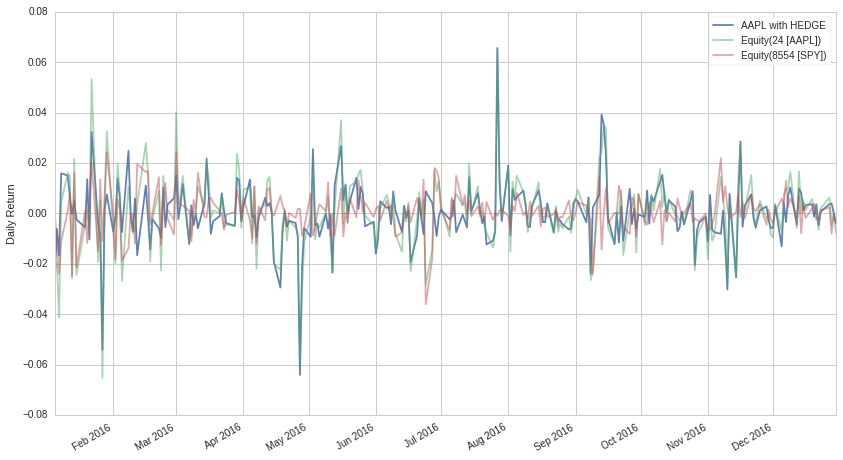

In [38]:
portfolio.plot(alpha=0.9,label='AAPL with HEDGE')
asset_returns_2016.plot(alpha=0.5)
benchmark_returns_2016.plot(alpha=0.5)
plt.ylabel('Daily Return')
plt.legend()

In [48]:
portfolio.mean()

1.6799024809993652e-05

In [49]:
asset_returns_2016.mean()

0.000574549568770769